# SMALL PROJECT: FaceMask detection


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
import random
import cv2

# Get the dataset from Gitlab

1.   Classes are the folder names
2.   There are two classes "WithMask" and "WithoutMask"



In [4]:
! git clone https://gitlab.com/tgott/machine-learning-fundamentals/

Cloning into 'machine-learning-fundamentals'...
remote: Enumerating objects: 11757, done.
remote: Counting objects: 100% (11757/11757), done.
remote: Compressing objects: 100% (11740/11740), done.
^C


In [ ]:
## Declare Directory
train_dir = "/content/machine-learning-fundamentals/Small_Project/Dataset/Train"
val_dir = "/content/machine-learning-fundamentals/Small_Project/Dataset/Validation"
test_dir = "/content/machine-learning-fundamentals/Small_Project/Dataset/Test"

classes = ["With Mask", "Without Mask"]

## Display "n" images from each class

(153, 153, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)


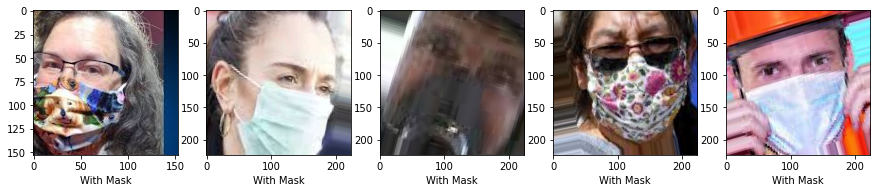

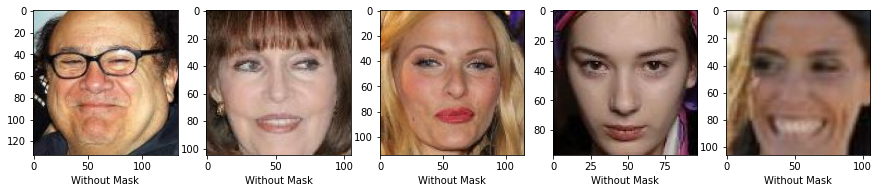

In [ ]:
n = 5
## Check Image
plt.figure(figsize=(15, n))
for i in range(n):
    # read image
    sample = random.choice(os.listdir(train_dir + "/WithMask"))
    # print("filename:", sample)
    img_dir = train_dir + "/WithMask/" + sample
    img = cv2.imread(img_dir)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    print(img.shape)
    # plot image
    plt.subplot(1, n, 1+i)
    plt.imshow(img)
    plt.xlabel("With Mask")
plt.show()   

plt.figure(figsize=(15, n))
for i in range(n):
    # read image
    sample = random.choice(os.listdir(train_dir + "/WithoutMask"))
    # print("filename:", sample)
    img_dir = train_dir + "/WithoutMask/" + sample
    img = cv2.imread(img_dir)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # plot image
    plt.subplot(1, n, 1+i)
    plt.imshow(img)
    plt.xlabel("Without Mask")
plt.show()   

## Data Augmentation 

In [ ]:
## Data Augmentation 
from keras.preprocessing.image import ImageDataGenerator

# Dataset Loader
train_datagen = ImageDataGenerator(
                                rescale=1./255,
                                rotation_range=0.2,
                                #width_shift_range=0.1,
                                #height_shift_range=0.1,
                                shear_range=0.2,
                                #zoom_range=0.09,
                                horizontal_flip=True,
                                vertical_flip=False,
                                #validation_split=0.1
                                )

val_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
# Image Generator Config
target_size = (120, 120)
batch_size = 16

# Load Dataset
train_dataset = train_datagen.flow_from_directory(train_dir,
                                                  target_size=target_size,
                                                  batch_size=batch_size,
                                                  class_mode="categorical",
                                                  shuffle=True)

val_dataset = val_datagen.flow_from_directory(val_dir,
                                              target_size=target_size,
                                              batch_size=batch_size,
                                              class_mode="categorical",
                                              shuffle=False)
print("Batch size with image is: ", train_dataset[0][0].shape)

Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Batch size with image is:  (16, 120, 120, 3)


In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

model = keras.Sequential(
    [
        keras.Input(shape=(120,120,3)),
       ## YOUR CODE HERE
        keras.layers.Dense(2, activation="softmax"),
    ]
)

model.summary()


## Setting backprop of model (how this model learning)
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics ="accuracy")

In [ ]:
# Training
EPOCHS = 10

history = model.fit(train_dataset, validation_data = val_dataset, batch_size=batch_size, epochs=EPOCHS)

Epoch 1/10
625/625 [==============================] - 42s 67ms/step - loss: 0.2563 - accuracy: 0.8905 - val_loss: 0.0605 - val_accuracy: 0.9775
Epoch 2/10
625/625 [==============================] - 42s 67ms/step - loss: 0.0644 - accuracy: 0.9774 - val_loss: 0.0242 - val_accuracy: 0.9900
Epoch 3/10
625/625 [==============================] - 41s 66ms/step - loss: 0.0329 - accuracy: 0.9881 - val_loss: 0.0434 - val_accuracy: 0.9837
Epoch 4/10
625/625 [==============================] - 41s 66ms/step - loss: 0.0464 - accuracy: 0.9843 - val_loss: 0.0446 - val_accuracy: 0.9850
Epoch 5/10
625/625 [==============================] - 42s 66ms/step - loss: 0.0381 - accuracy: 0.9860 - val_loss: 0.0238 - val_accuracy: 0.9950
Epoch 6/10
625/625 [==============================] - 42s 67ms/step - loss: 0.0329 - accuracy: 0.9887 - val_loss: 0.0310 - val_accuracy: 0.9887
Epoch 7/10
625/625 [==============================] - 42s 67ms/step - loss: 0.0331 - accuracy: 0.9862 - val_loss: 0.0282 - val_accuracy:

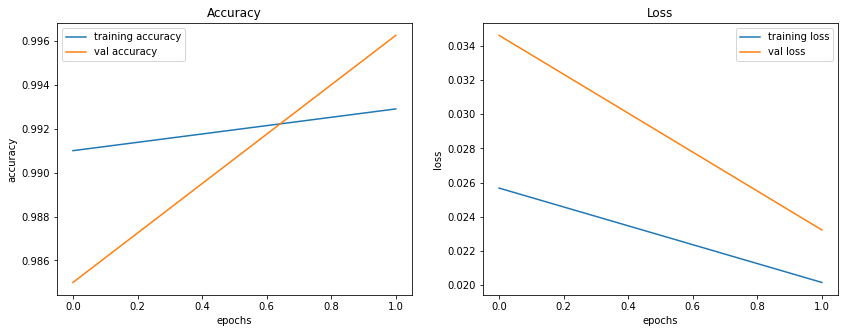

In [ ]:
## Review Our Model
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(14,5))
grid = gridspec.GridSpec(ncols=2,nrows=1,figure=fig)
fig.add_subplot(grid[0])
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

fig.add_subplot(grid[1])
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [ ]:
# Load Test Dataset
test_dataset = val_datagen.flow_from_directory(test_dir,
                                            target_size=target_size,
                                            batch_size=1,
                                            class_mode=None,
                                            shuffle=False)

Found 992 images belonging to 2 classes.


In [ ]:
probabilities = model.predict(test_dataset)

Accuracy Score of Model: 0.9868951612903226


Text(0.5, 1.0, 'Confusion matrix')

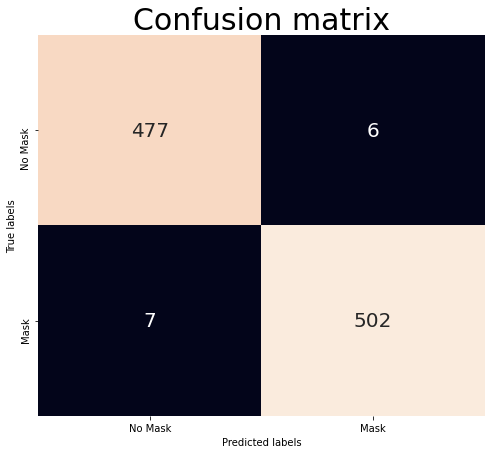

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

y_pred = probabilities.argmax(axis=-1)
y_test = test_dataset.classes

print("Accuracy Score of Model:", accuracy_score(y_pred,y_test))


labels = ["No Mask","Mask"]

fig, ax = plt.subplots(figsize=(8,7))
sns.heatmap(confusion_matrix(y_test,y_pred),xticklabels=labels, ax=ax, yticklabels=labels, annot=True,fmt="1.0f",cbar=False,annot_kws={"size": 20})
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
plt.title("Confusion matrix",fontsize=30)
